# Bank Churn Prediction
## Project Description

### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#### Data Dictionary

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer

CreditScore: It defines the credit history of the customer.  

Geography: A customer’s location    

Gender: It defines the Gender of the customer   

Age: Age of the customer     

Tenure: Number of years for which the customer has been with the bank

NumOfProducts: It refers to the number of products that a customer
has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

EstimatedSalary: Estimated salary

isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values

        0=No ( Customer did not leave the bank )

        1=Yes ( Customer left the bank )



# Import Libraries

In [ ]:
# manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# accuracy
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# modeling & hyperparameter tuning
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# to have same results whenever we run the code
from tensorflow.keras import backend
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# warnings
import warnings
warnings.filterwarnings('ignore')

# Import, Explore and Modify Data

* Datatypes and memory
* Drop unnecessary columns
* Duplicated Values
* Missing Values
* Shape and Size
* Unique Values


In [ ]:
# import data and show first 5 rows
# make copy of data to have original data too
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL&AI /Datasets/Churn.csv')
df_copy = df.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# shape
print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns.')

Data has 10000 rows and 14 columns.


In [ ]:
# datatypes and memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# change objects to categories
df.Geography = df.Geography.astype('category')
df.Gender = df.Gender.astype('category')

# view info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(9), object(1)
memory usage: 957.4+ KB


We turned the  objects into categories and reduced around 200 KB in memory.

In [ ]:
# missing values
print(f'Data has {df.isna().values.sum()} missing values.')

Data has 0 missing values.


In [ ]:
# duplicated values
print(f'Data has {df.duplicated().sum()} duplicates.')

Data has 0 duplicates.


In [ ]:
# unique values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# drop RowNumber, Surname and CustomerId columns

## it is used for identification, so it
## will not help us in analysis and modeling
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Exploratory Data Analysis
* Bivariate Analysis
* Correlations and Colinearity
* Distributions
* Statistical Analysis
* Univariate Analysis
* Visualization


In [ ]:
# 5 point summary
five_pt_summary = df.describe()
five_pt_summary = pd.DataFrame(five_pt_summary)
five_pt_summary

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univariate Analysis

### Numerical Variables

In [ ]:
# function for plotting histogram
def hist(data, feature):
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=feature, kde=True)
  plt.axvline(df[feature].mean(), color="black", linestyle="--") # add green line on mean
  plt.axvline(df[feature].median(), color="red", linestyle="--") # add red line on median
  plt.show()
  print(five_pt_summary[feature])

#### Credit Score

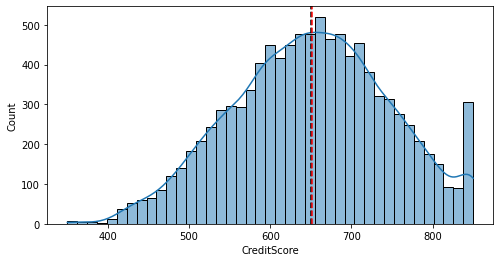

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [ ]:
hist(df, 'CreditScore')

#### Age

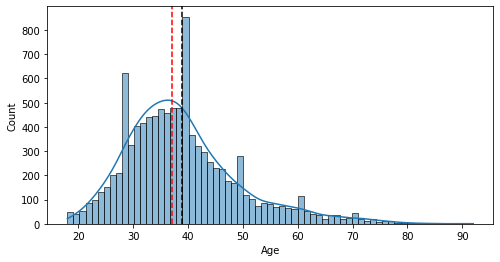

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [ ]:
hist(df, 'Age')

#### Balance

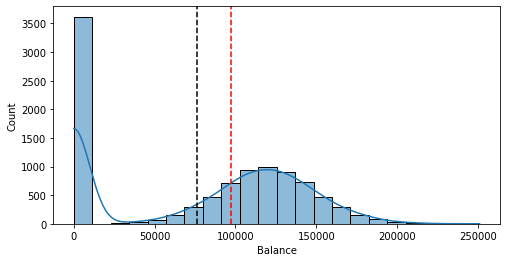

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [ ]:
hist(df, 'Balance')

#### Estimated Salary

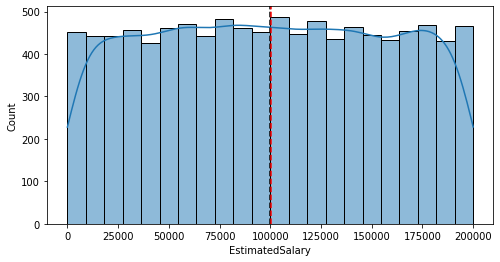

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [ ]:
hist(df, 'EstimatedSalary')

### Categorical Variables

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# define countplot function
def count(data, feature):
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=feature)
  plt.show()
  print('Count:')
  print(df[feature].value_counts())
  print('-'*30)
  print('Percentage:')
  print(df[feature].value_counts(1)*100)

#### Geography

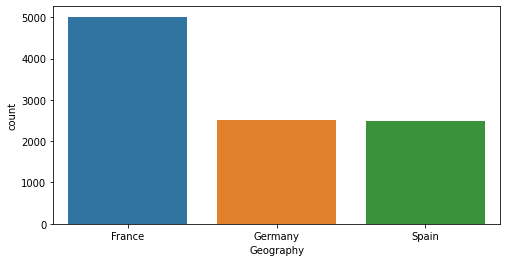

Count:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Percentage:
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64


In [ ]:
count(df, 'Geography')

#### Gender

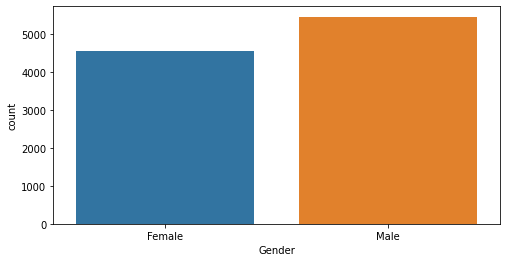

Count:
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------
Percentage:
Male      54.57
Female    45.43
Name: Gender, dtype: float64


In [ ]:
count(df, 'Gender')

#### Tenure

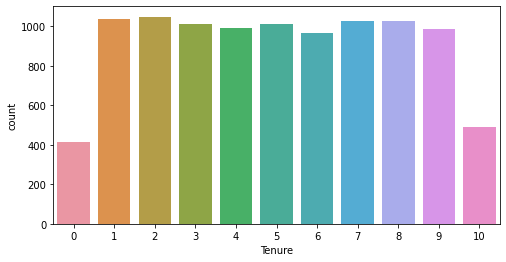

Count:
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------
Percentage:
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64


In [ ]:
count(df, 'Tenure')

#### Number of Products

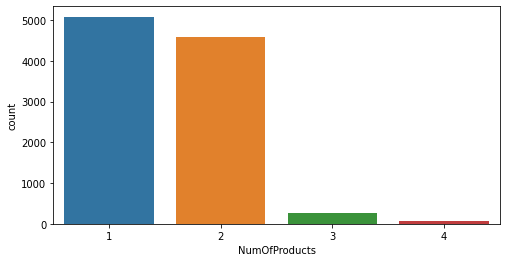

Count:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
------------------------------
Percentage:
1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64


In [ ]:
count(df, 'NumOfProducts')

#### Has Card?

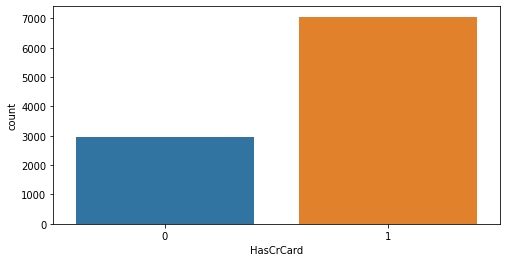

Count:
1    7055
0    2945
Name: HasCrCard, dtype: int64
------------------------------
Percentage:
1    70.55
0    29.45
Name: HasCrCard, dtype: float64


In [ ]:
count(df, 'HasCrCard')

#### Is Active Member?

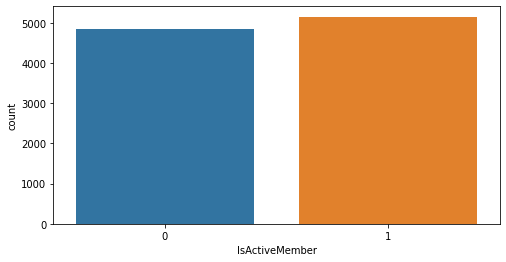

Count:
1    5151
0    4849
Name: IsActiveMember, dtype: int64
------------------------------
Percentage:
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64


In [ ]:
count(df, 'IsActiveMember')

#### Exited?

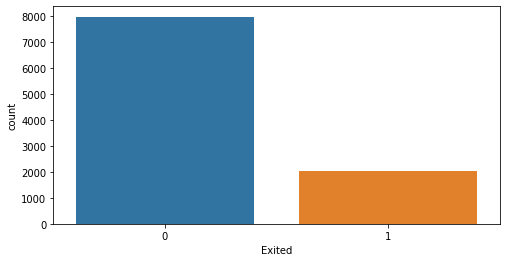

Count:
0    7963
1    2037
Name: Exited, dtype: int64
------------------------------
Percentage:
0    79.63
1    20.37
Name: Exited, dtype: float64


In [ ]:
count(df, 'Exited')

## Bivariate Analysis

### Pairplot

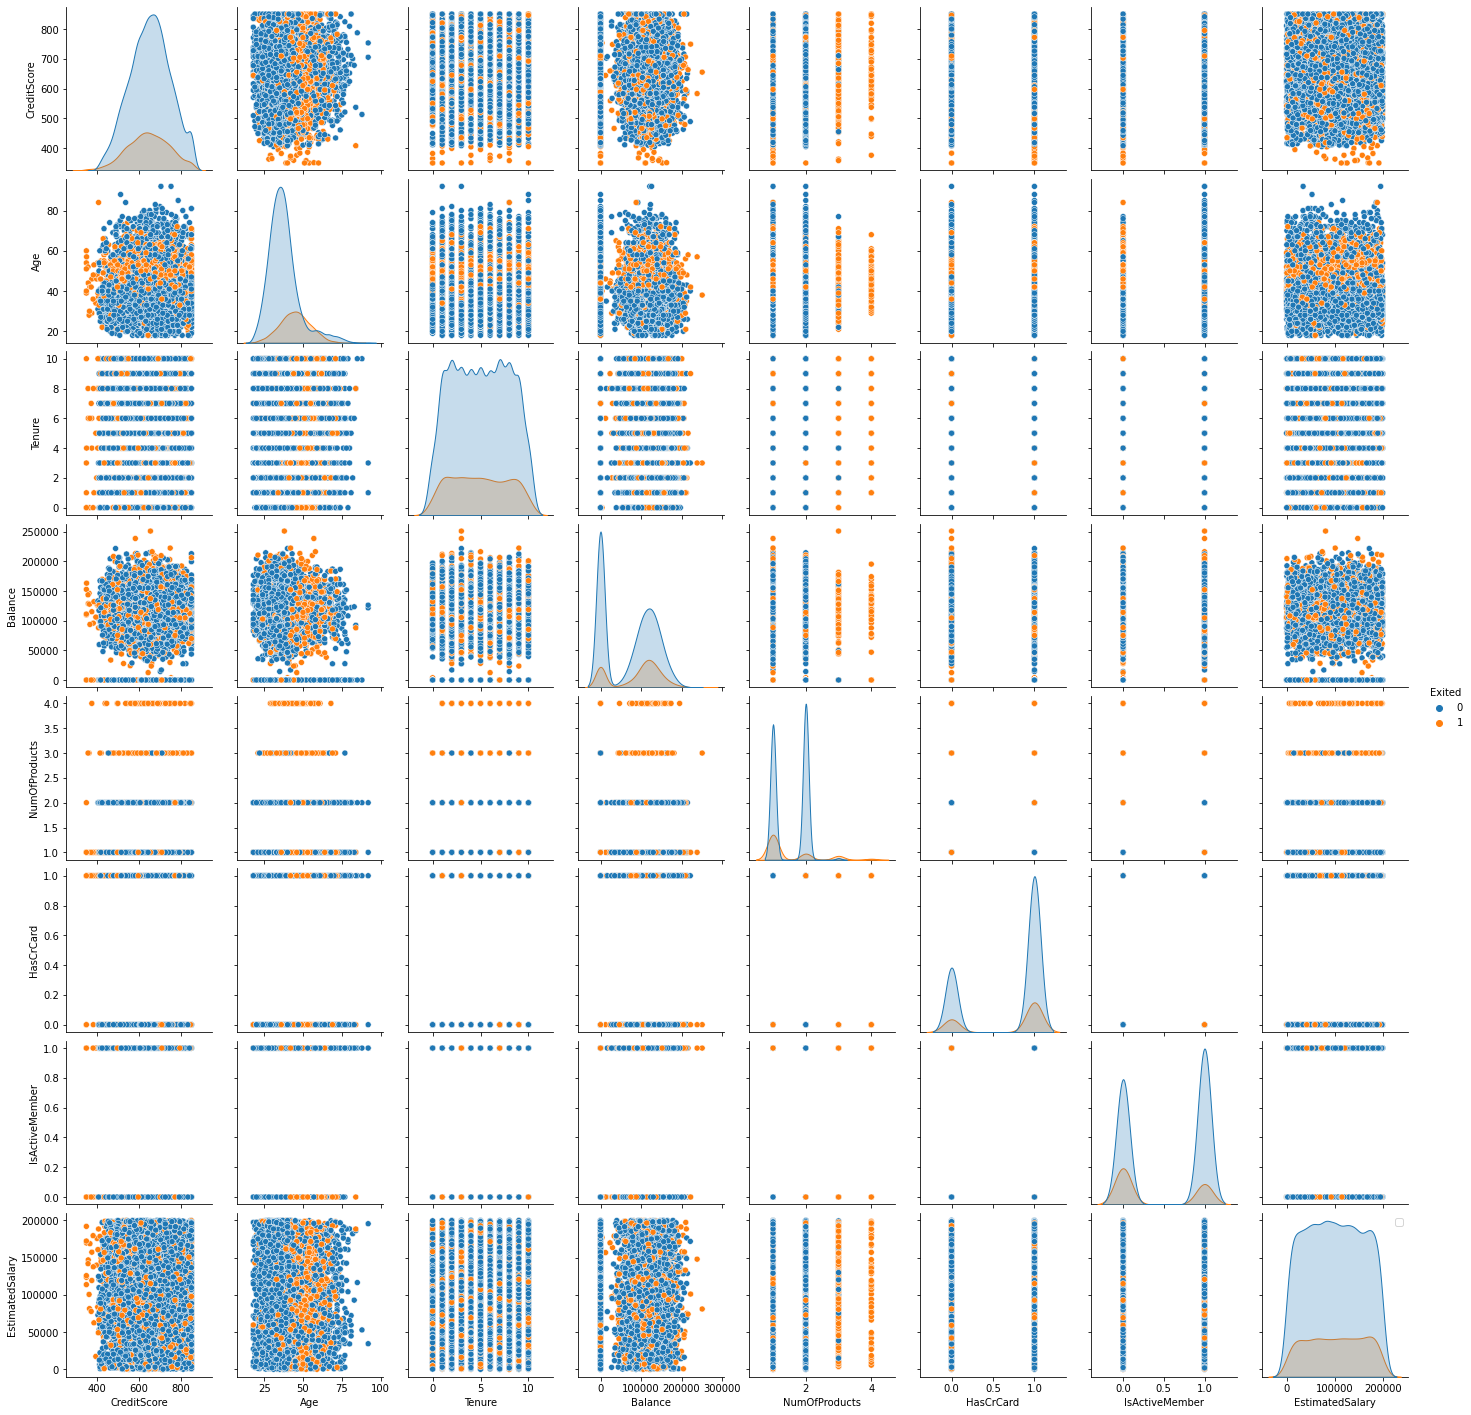

In [ ]:
# pairplot to compare characteristics of those who exited and those who did not
sns.pairplot(df, hue='Exited')
plt.legend()

There seems to be an interesting pattern in the Age and Number of Products variable.
* Age: People who exited seem to be in their 50's, maybe in the 45-55 range
* Number of Products: It seems to be that the number of exits increases as the number of products increases, an interesting correlation to follow.

### Correlation Heatmap

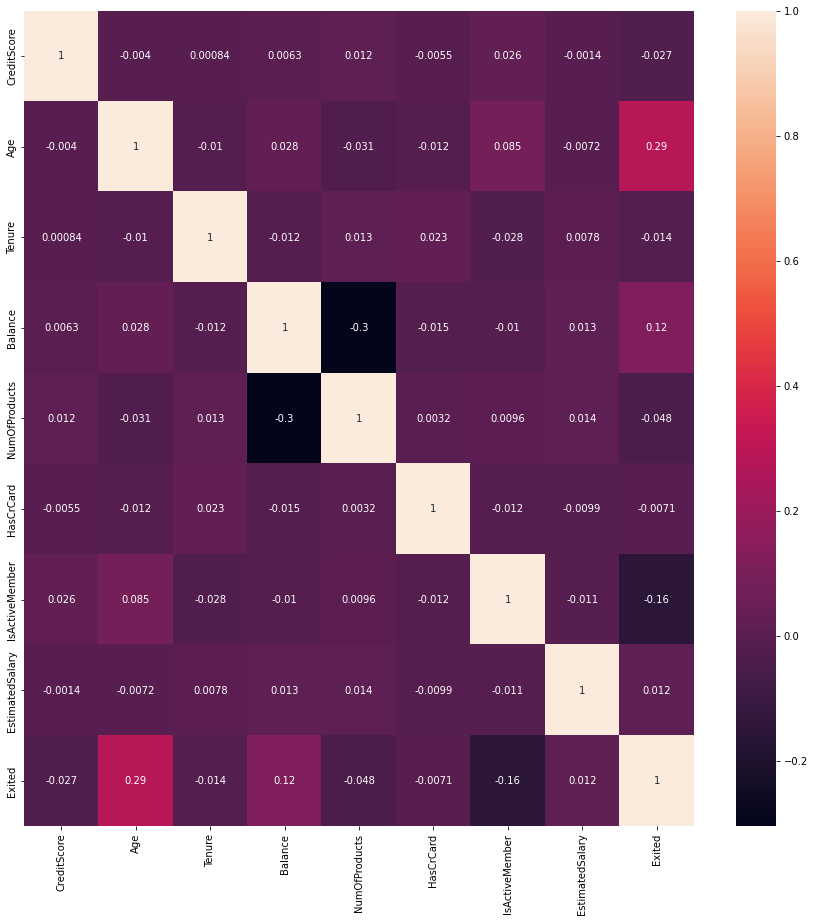

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

There are no highly correlated values, except for Age and Exited, as suspected earlier. It has a 0.29 correlation coefficient, which is relatively high considering the second highest correlation is 0.12.

### Scatter and Regplots

In [ ]:
# function to create scatter and plots
# scatterplot will have Exited as hue
# regplot will have trendline
def scatter_regplot(df, x_feature, y_feature):
  plt.figure(figsize=(8,5))
  sns.regplot(df[x_feature], df[y_feature])
  plt.show()
  plt.figure(figsize=(8,5))
  sns.scatterplot(data=df, x=x_feature, y=y_feature, hue=df['Exited'])
  plt.show()

#### Credit Score and Age

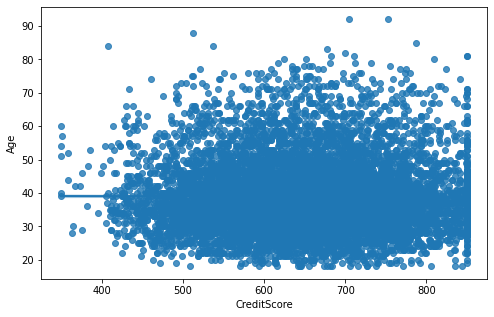

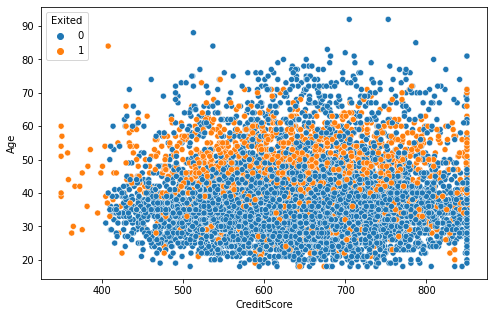

In [ ]:
scatter_regplot(df, 'CreditScore', 'Age')

#### Credit Score and Balance

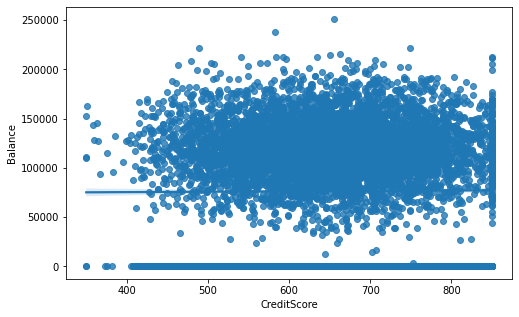

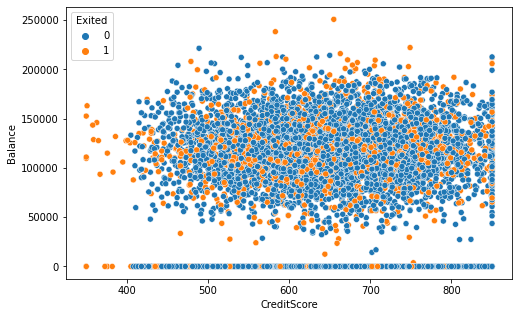

In [ ]:
scatter_regplot(df, 'CreditScore', 'Balance')

#### Credit Score and Estimated Salary

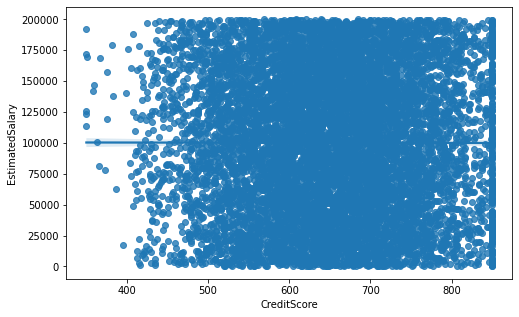

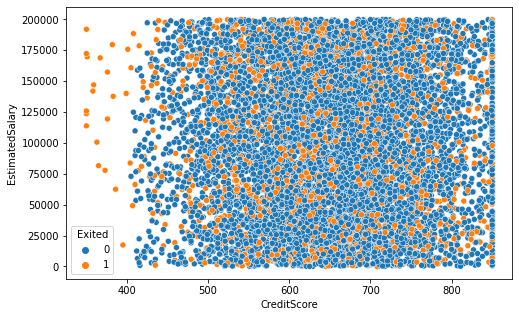

In [ ]:
scatter_regplot(df, 'CreditScore', 'EstimatedSalary')

#### Age and Balance

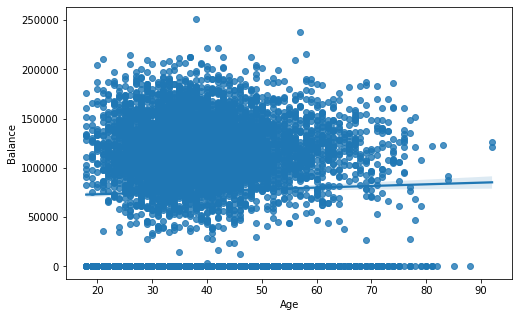

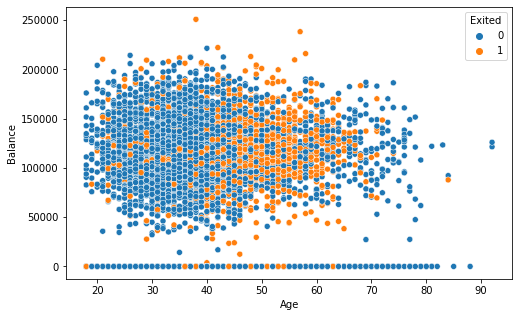

In [ ]:
scatter_regplot(df, 'Age', 'Balance')

#### Balance and Estimated Salary

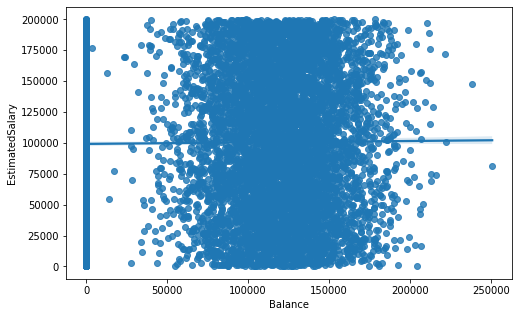

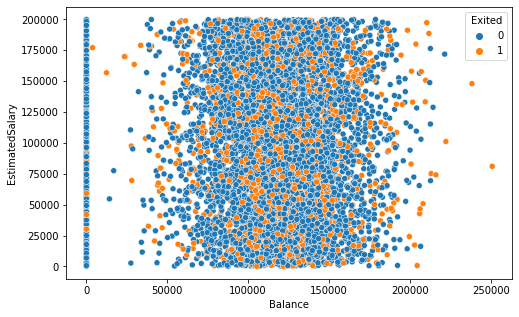

In [ ]:
scatter_regplot(df, 'Balance', 'EstimatedSalary')

### Exited relationship with Categorical Variables

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# define countplot function
# add Exited as hue
def count(data, feature):
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=feature, hue='Exited')
  plt.show()

#### Geography and Exited

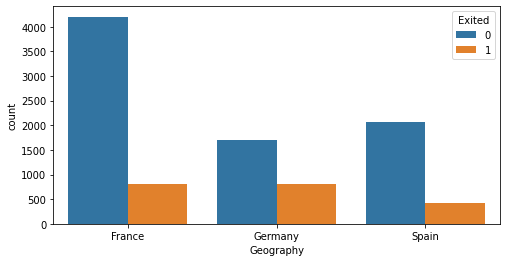

In [ ]:
count(df, 'Geography')

#### Gender and Exited

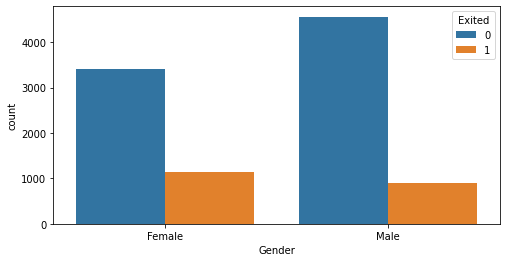

In [ ]:
count(df, 'Gender')

#### Tenure and Exited

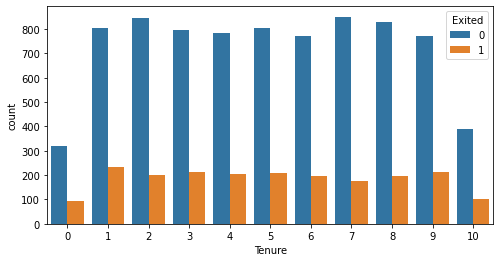

In [ ]:
count(df, 'Tenure')

#### Number of Products and Exited

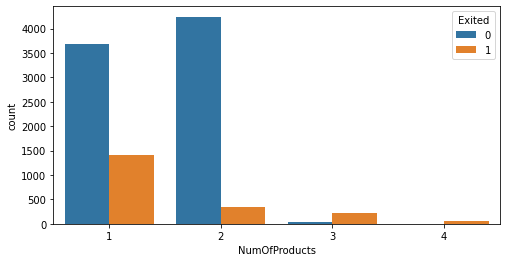

In [ ]:
count(df, 'NumOfProducts')

#### Has Credit Card and Exited

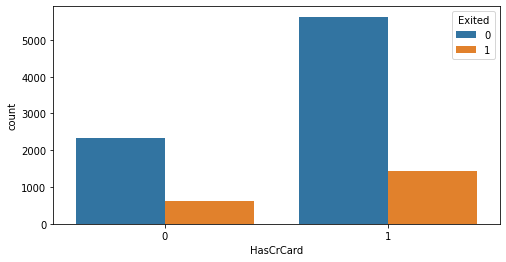

In [ ]:
count(df, 'HasCrCard')

#### Is Active Member and Exited

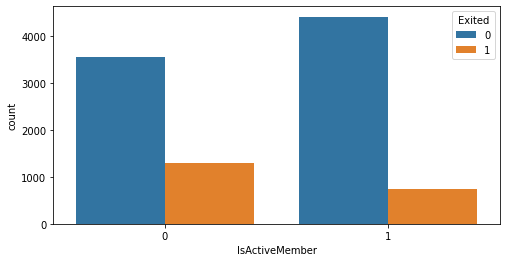

In [ ]:
count(df, 'IsActiveMember')

## Comparison between customers who exited and those who did not exit

In [ ]:
exited = df[df.Exited==1]
non_exited = df[df.Exited==0]

In [ ]:
exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [ ]:
non_exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


## Insights from EDA
- There is no relationship between variables
- Apparently Age is one of the most important factors to decide whether someone will leave or not, as shown by the previous graphs. - Customers who exit are on average 7.4 years older than customers who did not exit
- German customers are the ones that are most likely to exit, followed by Spanish customers
- Apparently the higher number of products the more likely a client is to leave the bank. Is this a sign that the bank's products are not good?
- The shortest and longest tenured (0 and 10 years) are most likely to leave the bank
- Females are way more likely to leave than males
- Someone who does not have a card is more likely to exit, so it is recommended to the bank that they motivate customers to have a card
- Customers who are not considered active members are more likely to leave, how can customers be more active?

# Data Preprocessing
* Data Split
* Label Encode variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [ ]:
# define X and y
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
# define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('-'*30)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (8000, 10)
X_test: (2000, 10)
------------------------------
y_train: (8000,)
y_test: (2000,)


In [ ]:
# Use label encoder to make Geography and gender numerical variables

# Geography
labelencoder_geo = LabelEncoder()
X_train.Geography = labelencoder_geo.fit_transform(X_train.Geography)
X_test.Geography = labelencoder_geo.fit_transform(X_test.Geography)

# Gender
labelencoder_gen = LabelEncoder()
X_train.Gender = labelencoder_gen.fit_transform(X_train.Gender)
X_test.Gender = labelencoder_gen.fit_transform(X_test.Gender)

X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04


In [ ]:
# normalize data with standard scaler
sc = StandardScaler()
temp = sc.fit(X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] =  sc.fit_transform(X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
X_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = temp.fit_transform(X_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])

In [ ]:
# view normalized data
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,0.356500,-0.905550,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670
1561,-0.203898,0.301649,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254
1670,-0.961472,1.508847,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807
6087,-0.940717,-0.905550,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393
6669,-1.397337,-0.905550,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600


# Model Building, Improvement and Evaluation
* Build several Neural Networks
* Compare and choose best model
* Define performance metric(s)
* Hyperparameter Tuning
* Optimal ROC-AUC Threshold


What metric should we choose?
* Recall, because we are interested in client that might leave the bank. This is because it is worse to predict a person that is leaving to leave than a customer who is not leaving to leave.
* That means we are interested in minimizing false negatives.

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
# define several functions and
# hyperparameters to simplify model building
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
input = X_train.shape[1]
loss = 'binary_crossentropy'
labels = ['True Negative','False Positive','False Negative','True Positive']

## Model 1
 Structure:
* 3 hidden layers
* Layers with 128, 64, 32 neurons

Activation:
* ReLU activation
* Sigmoid activation for final layer

Hyperparameters:
* No dropout
* No batch normalization
* No weight inizialization
* Adam optimizer with LR 0.001
* Loss = Binary Crossentropy
* Epochs = 50
* Batch Size = 128
* Validation split = 0.20

In [ ]:
# set random seed
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build model

# define model
model1 = Sequential()
# hidden layers
model1.add(Dense(128, activation='relu', input_dim=input))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model1.compile(loss= loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
# sumamry
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history1 = model1.fit(X_train, y_train, validation_split=0.20, batch_size=128, epochs=50, verbose=1)

Epoch 1/50
50/50 [==============================] - 2s 11ms/step - loss: 0.5115 - accuracy: 0.7686 - val_loss: 0.4294 - val_accuracy: 0.8169
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4238 - accuracy: 0.8225 - val_loss: 0.3995 - val_accuracy: 0.8388
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.3903 - accuracy: 0.8462 - val_loss: 0.3747 - val_accuracy: 0.8500
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.8547 - val_loss: 0.3571 - val_accuracy: 0.8531
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.8581 - val_loss: 0.3511 - val_accuracy: 0.8500
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8591 - val_loss: 0.3478 - val_accuracy: 0.8506
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.8608 - val_loss: 0.3459 - val_accuracy: 0.8512
Epoch 8/50
50/50 [=

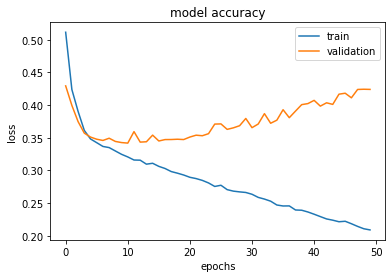

In [ ]:
# plot learning curve
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])

plt.legend(('train', 'validation'))
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.171138, G-Mean=0.754


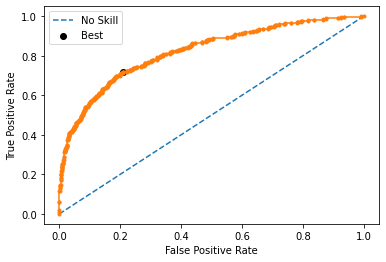

In [ ]:
# find best threshold
yhat1 = model1.predict(X_test)
yhat1 = yhat1[:, 0]
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
gmeans1 = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))

# plot roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# set threshold at 0.5
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > thresholds1[ix])

63/63 [==============================] - 0s 1ms/step


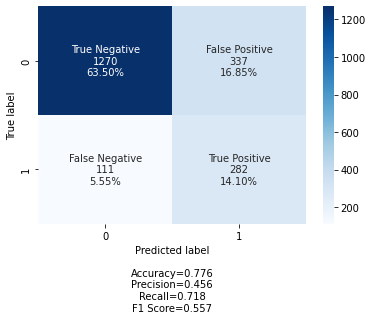

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
make_confusion_matrix(cm1, group_names=labels, categories='auto', cmap='Blues')

In [ ]:
# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1607
           1       0.46      0.72      0.56       393

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.83      0.78      0.79      2000



#### Insights on Model 1
* Model seems to have some noise, as there are many spikes in learning curve
* Validation and training sets are very similar
* It significantly reduced loss but it could have done more if it trained for longer
* It performs better on the majority class (0) than minority class (1), we could later try SMOTE to minimize difference between classes

## Model 2
Modifications from Model 1:
- Add 1 hidden layer, 4 in total
- New hidden layer will have 256 neurons
- Introduce Batch Normalization to model after every layer, as previous model overfitted
- Train for 100 epochs



 Structure:
* 4 hidden layers
* Layers with 256, 128, 64, 32 neurons

Activation:
* ReLU activation
* Sigmoid activation for final layer

Hyperparameters:
* No dropout
* Add batch normalization
* No weight inizialization
* Adam optimizer with LR 0.001
* Loss = Binary Crossentropy
* Epochs = 100
* Batch Size = 128
* Validation split = 0.20

In [ ]:
# set random seed
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build model

# define model
model2 = Sequential()

# hidden layers
model2.add(Dense(256, activation='relu', input_dim = input))
model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model2.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
# sumamry
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [ ]:
# train model
history2 = model2.fit(X_train, y_train, validation_split=0.20, batch_size=128, epochs=100, verbose=1)

Epoch 1/100


StagingError: ignored

In [ ]:
# plot learning curve
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(('train', 'validation'))

plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
# find best threshold
yhat2 = model2.predict(X_test)
yhat2 = yhat2[:, 0]
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
gmeans2 = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))

# plot roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# set threshold
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > thresholds2[ix])

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
make_confusion_matrix(cm2, group_names=labels, categories='auto', cmap='Blues')

In [ ]:
cr2 = classification_report(y_test, y_pred2)
print(cr2)

#### Insights on Model 2
* It does not seem to overfit, maybe Batch Normalization helped reduce it
* Training and validation lines are quite similar
* It does a very bad job in recall, which is our metric of interest

## Model 3
Modifications from Model 2:

- Introduce Dropout after every model
- Add he_uniform weight initialization
- Train for 80 epochs
- Batch Size = 256

Structure:
* 4 hidden layers
* Layers with 256, 128, 64, 32 neurons

Activation:
- ReLU activation
- Sigmoid activation for final layer

Hyperparameters:
- With dropout
- Batch normalization
- Weight inizialization
- Adam optimizer with LR 0.001
- Loss = Binary Crossentropy
- Epochs = 50
- Batch Size = 256
- Validation split = 0.20

In [ ]:
# set random seed
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build model

# define model
model3 = Sequential()
model3.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim=input))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model3.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
# sumamry
model3.summary()

In [ ]:
# train model
history3 = model3.fit(X_train, y_train, validation_split=0.20, verbose=1, batch_size=256, epochs=50)

In [ ]:
# plot learning curve
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(('train', 'validation'))

plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
# find best threshold
yhat3 = model3.predict(X_test)
yhat3 = yhat3[:, 0]
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
gmeans3 = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))

# plot roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# set threshold
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > thresholds3[ix])

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
make_confusion_matrix(cm3, group_names=labels, categories='auto', cmap='Blues')

In [ ]:
cr3 = classification_report(y_test, y_pred3)
print(cr3)

#### Insights on Model 3
* It has highes recall until now (on 1)
* It is weird that it reduced very quickly the loss and then stayed the same
- It does not perform that well, as it is in the 50's in most metrics

## Model 4
Modifications from Model 2:

- Add SMOTE oversampling technique
- Use Dropout and Batch Normalization 2 times only
- Batch size = 64

Structure:

- 4 hidden layers
-Layers with 256, 128, 64, 32 neurons
-Activation:

- ReLU activation
- Sigmoid activation for final layer

Hyperparameters:

- With dropout
- Batch normalization
- Weight inizialization
- Adam optimizer with LR 0.001
- Loss = Binary Crossentropy
- Epochs = 50
- Batch Size = 64
- Validation split = 0.20

In [ ]:
# set random seed
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build model

# define model
model4 = Sequential()
model4.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim=input))
model4.add(Dropout(0.25))
model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.25))
model4.add(BatchNormalization())
model4.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model4.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
# sumamry
model4.summary()

In [ ]:
# SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
# train model
history4 = model4.fit(X_sm, y_sm, batch_size=64, epochs=50, validation_split=0.20, verbose=1)

In [ ]:
# plot learning curve
hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch

plt.plot(hist4['loss'])
plt.plot(hist4['val_loss'])
plt.legend(('train', 'validation'))

plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
# find best threshold
yhat4 = model4.predict(X_test)
yhat4 = yhat4[:, 0]
fpr, tpr, thresholds4 = roc_curve(y_test, yhat3)
gmeans4 = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))

# plot roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# set threshold
y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4 > thresholds4[ix])

In [ ]:
# confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
make_confusion_matrix(cm4, group_names=labels, categories='auto', cmap='Blues')

In [ ]:
# classification report
cr4 = classification_report(y_test, y_pred4)
print(cr4)

#### Insights on Model 4
- Model is highly overfititng, because of the difference between train and validation curves
- It is likely that the model is too complex, as it got most of the predictions wrong
- It is the worst performing model until now

# Hyperparameter Tuning

In [ ]:
# function to create model
def create_model(lr, batch_size, num_layers):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = input))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    model.compile(optimizer = opt ,loss = loss, metrics = ['accuracy'])
    return model

In [ ]:
# run randomized search
model5 = KerasClassifier(build_fn=create_model, verbose=1)

parameters = {
    'num_layers': np.arange(2,10,1),
    'lr': [0.1, 0.01, 0.001],
    'batch_size': np.arange(32,256,32)
}

# best score and parameters from randomized search
random = RandomizedSearchCV(estimator=model5, verbose=1, cv=5, param_distributions=parameters, n_jobs=-1)
random_result = random.fit(X_train, y_train, validation_split=0.20, verbose=1)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

In [ ]:
batch = random_result.best_params_['batch_size']
lr = random_result.best_params_['lr']
num_layers=lr = lr=random_result.best_params_['num_layers']

estimator = create_model(batch_size=batch, lr=lr, num_layers=num_layers)

In [ ]:
estimator.summary()

In [ ]:
estimator.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
history_estimator = estimator.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.20, batch_size=64)

In [ ]:
# plot learning curve
hist5 = pd.DataFrame(history_estimator.history)
hist5['epoch'] = history_estimator.epoch

plt.plot(hist5['loss'])
plt.plot(hist5['val_loss'])
plt.legend(('train', 'validation'))

plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
# find best threshold
yhat5 = estimator.predict(X_test)
yhat5 = yhat5[:, 0]
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
gmeans5 = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))

# plot roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# set threshold
y_pred5 = estimator.predict(X_test)
y_pred5 = (y_pred5 > thresholds5[ix])

In [ ]:
# confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)
make_confusion_matrix(cm5, group_names=labels, categories='auto', cmap='Blues')

In [ ]:
# classification report
cr5 = classification_report(y_test, y_pred5)
print(cr5)

#### Insights on Model 5
* It is more balanced than previous models
- Even though we balanced the classes, the model still has trouble finding out customers who will leave the bank

# Best Model

In [ ]:
# classification report comparison
print('Model 1')
print(cr1)
print('-'*50)
print('Model 2')
print(cr2)
print('-'*50)
print('Model 3')
print(cr3)
print('-'*50)
print('Model 4')
print(cr4)
print('-'*50)
print('Model 5')
print(cr5)

The best model is Model 3 because of the following reasons:
* It has the highest recall (macro average), meaning it identifies best customers who will leave the bank
* It does not overfit
* It has the highest recall on the "1" class

# Conclusion & Takeaways

## Insights

- Customers who exit are on average 7.4 years older than customers who did not exit
- Apparently the higher number of products the more likely a client is to leave the bank. Is this a sign that the bank's products are not good?
- The shortest and longest tenured (0 and 10 years) are most likely to leave the bank
- Females are way more likely to leave than males
- Someone who does not have a card is more likely to exit
- Customers who are not considered active members are more likely to leave

## Recommendations
- Focus on middle aged customers, between ages 40 and 60, as they are the ones most likely to leave the bank.

- Motivate customers to be active clients. If a customer is active he/she will be less likely to leave, so this might be a solution to the problem.

- The more products a customer has the more likely he is to leave the bank. This fact implies that probably the bank's products are not good, so it is recommendable to improve their products and services, and to put a special focus on customers who have more bank products.

- Motivate customers to obtain credit cards. Most people who leave do not have credit cards. This might also go in hand with last point, so maybe the other products are the ones that need improvement.